# Inferência Estatística

## Distribuição normal

$$
P(x) = \dfrac{x!}{x! (n - x)!} p^x q ^{n-x}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

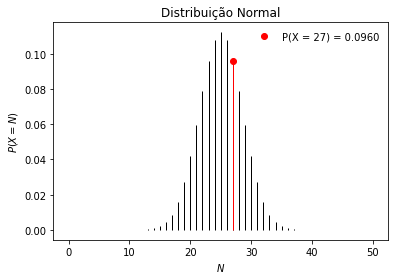

In [24]:
fig, ax = plt.subplots(1,1)

n, p = 50, 0.5
x = np.arange(n+1)

rv = binom(n, p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1)

N = x[int(.54 * len(x))]
P = rv.pmf(N)
ax.vlines(N, 0, P, colors='r', linestyles='-', lw=1)
plt.plot(N, P, 'ro', label=f'P(X = {N}) = {P:.4f}')

plt.title('Distribuição Normal')
plt.xlabel('$N$')
plt.ylabel('$P(X = N)$')

plt.legend(frameon=False)

plt.show()

## Distribuição de Poisson

$$
    f(k, \lambda) = Pr(X = k) = \dfrac{\lambda^k e^{-\lambda}}{k!}
$$

In [25]:
from scipy.stats import poisson

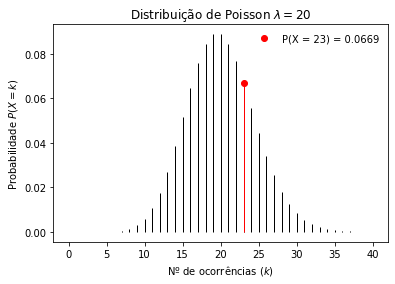

In [43]:
fig, ax = plt.subplots(1,1)
l = 20
rv = poisson(l)
x = np.arange(2 * l + 1)
P_x = np.asarray([rv.pmf(_) for _ in x])

ax.vlines(x, 0, P_x, colors='k', linestyles='-', lw=1)

k = 23
P_k = rv.pmf(k)
ax.vlines(k, 0, P_k, colors='r', linestyles='-', lw=1)
plt.plot(k, P_k, 'ro', label=f'P(X = {k}) = {P_k:.4f}')


plt.title(f'Distribuição de Poisson $\lambda = {l}$')
plt.xlabel('Nº de ocorrências ($k$)')
plt.ylabel('Probabilidade $P(X = k)$')
plt.legend(frameon=False)
plt.show()

## Distribuição de Bernoulli

\begin{equation}
    P(n) = 
    \begin{cases}
    1 - p & \mbox{para } n = 0\\
    p & \mbox{para } n = 1
    \end{cases}
\end{equation}

$$
    P(n) = p^n(1 - p)^{1-n}
$$

## z-score

$$
z = \dfrac{X - \mu}{\sigma}
$$

In [45]:
classscore = np.random.normal(50, 10, 60).round()
classscore

array([52., 55., 48., 42., 43., 42., 49., 58., 48., 39., 55., 41., 69.,
       56., 68., 57., 42., 43., 40., 44., 46., 51., 61., 51., 53., 36.,
       57., 61., 37., 55., 42., 58., 40., 37., 40., 56., 39., 65., 50.,
       39., 52., 44., 42., 60., 48., 57., 45., 52., 46., 55., 34., 60.,
       52., 41., 44., 58., 51., 40., 61., 28.])

In [69]:
from scipy import stats

In [49]:
from scipy.stats import zscore

In [50]:
z_classscore = zscore(classscore)
z_classscore

array([ 0.3470272 ,  0.68467528, -0.10317025, -0.77846641, -0.66591705,
       -0.77846641,  0.00937911,  1.02232336, -0.10317025, -1.1161145 ,
        0.68467528, -0.89101578,  2.26036634,  0.79722464,  2.14781697,
        0.909774  , -0.77846641, -0.66591705, -1.00356514, -0.55336769,
       -0.32826897,  0.23447784,  1.35997145,  0.23447784,  0.45957656,
       -1.45376258,  0.909774  ,  1.35997145, -1.34121322,  0.68467528,
       -0.77846641,  1.02232336, -1.00356514, -1.34121322, -1.00356514,
        0.79722464, -1.1161145 ,  1.81016889,  0.12192847, -1.1161145 ,
        0.3470272 , -0.55336769, -0.77846641,  1.24742209, -0.10317025,
        0.909774  , -0.44081833,  0.3470272 , -0.32826897,  0.68467528,
       -1.6788613 ,  1.24742209,  0.3470272 , -0.89101578, -0.55336769,
        1.02232336,  0.23447784, -1.00356514,  1.35997145, -2.35415747])

In [68]:
z_60 = z_classscore[list(classscore).index(60)]
z_60

1.2474220853163083

In [70]:
prob_60 = 1 - stats.norm.cdf(z_60)
prob_60

0.10612138635680579

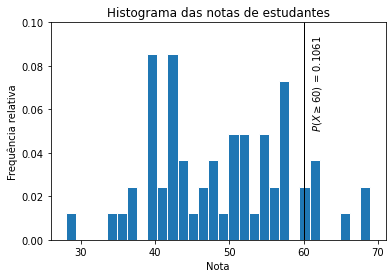

In [100]:
n = 60
z = z_classscore[list(classscore).index(n)]
prob = 1 - stats.norm.cdf(z)

plt.hist(classscore, 30, edgecolor='white', density=True)

plt.vlines(n, 0, 0.10, colors='k', lw = 1)

plt.title('Histograma das notas de estudantes')
plt.xlabel('Nota')
plt.ylabel('Frequência relativa')

plt.text(s=f' $P(X \geq {n})$ = {prob:.4f}', x=n+1, y=0.05, rotation=90)


plt.ylim(0, 0.10)
plt.show()

In [101]:
zscore = (53 - 60) / 3.0
zscore

-2.3333333333333335

In [102]:
prob = stats.norm.cdf(zscore)
prob

0.009815328628645334

## Intervalos de confiança

In [103]:
height_data = np.array([ 
    186.0, 180.0, 195.0, 189.0, 191.0,
    177.0, 161.0, 177.0, 192.0, 182.0, 185.0, 192.0,
    173.0, 172.0, 191.0, 184.0, 193.0, 182.0, 190.0, 185.0, 181.0,
    188.0, 179.0, 188.0,
    170.0, 179.0, 180.0, 189.0, 188.0, 185.0, 170.0, 197.0, 187.0,
    182.0, 173.0, 179.0,
    184.0, 177.0, 190.0, 174.0, 203.0, 206.0, 173.0, 169.0, 178.0,
    201.0, 198.0, 166.0, 171.0, 180.0
])

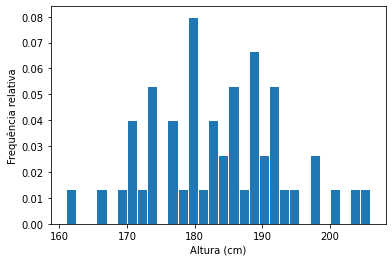

In [106]:
plt.hist(height_data, bins=30, density=True, edgecolor='w')

plt.xlabel('Altura (cm)')
plt.ylabel('Frequência relativa')
plt.show()

In [107]:
height_mean = height_data.mean()
height_mean

183.24

Erro Padrão da Média (SEmean)

$$
SE_\overline{x} = \dfrac{s}{\sqrt{n}}
$$

In [111]:
SEmean = stats.sem(height_data)
SEmean

1.3787187190005248

Cálculo do intervalo de confiança

Upper/Lower limit = mean(height) + / - sigma * SEmean(x)

In [114]:
sigma = 1.96

lower_limit = height_mean - sigma * SEmean

upper_limit = height_mean + sigma * SEmean

print(f"({lower_limit:.2f}, {upper_limit:.2f})")

(180.54, 185.94)


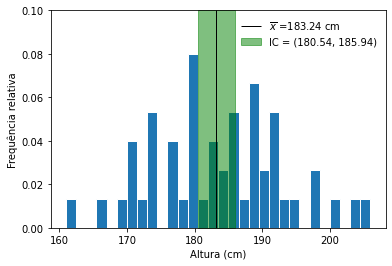

In [132]:
plt.hist(height_data, bins=30, density=True, edgecolor='w')

plt.vlines(height_mean, 0, 0.1, colors='k', linestyles='-', lw=1, label='$\overline{x}$ =' + f'{height_mean:.2f} cm')
plt.fill_between(np.arange(lower_limit, upper_limit, 0.1), 0, 0.10, color='g', alpha=0.5, label=f'IC = ({lower_limit:.2f}, {upper_limit:.2f})')

plt.xlabel('Altura (cm)')
plt.ylabel('Frequência relativa')
plt.ylim(0, 0.10)
plt.legend(frameon=False)
plt.show()

In [156]:
average_height = []

for i in range(500):
    sample50 = np.random.choice(height_data, size=50, replace=True)
    average_height.append(sample50.mean())

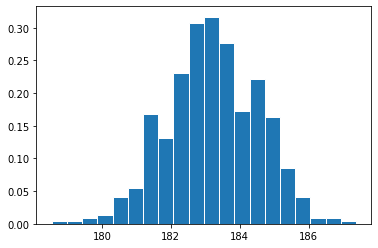

In [157]:
plt.hist(average_height, 20, density=True, edgecolor='w')
plt.show()